# **NLP Pre-Processing**

# **Dataset**
https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews?select=train.csv

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kritanjalijain/amazon-reviews")

print("Path to dataset files:", path)

100%|██████████| 1.29G/1.29G [00:50<00:00, 27.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kritanjalijain/amazon-reviews/versions/2


In [2]:
import pandas as pd
import os

#train_csv = os.path.join(path, 'train.csv')
test_csv = os.path.join(path, 'test.csv')

# Replace with the path the .txt file
#data_trainn = pd.read_csv(train_csv, header = None, sep = ',')
data_testt = pd.read_csv(test_csv, header = None, sep = ',')

In [3]:
#data_trainn.head()

In [4]:
#data_trainn.shape

In [5]:
data_testt.head()

,0,1,2
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


In [6]:
data_testt.shape

(400000, 3)

In [7]:
#data = pd.concat([data_trainn, data_testt], axis = 0, ignore_index = True)
data = data_testt
data.head()

,0,1,2
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


In [8]:
data.shape

(400000, 3)

In [9]:
data.dropna(inplace = True)

In [10]:
data.shape

(399976, 3)

In [11]:
data.columns = ['polarity', 'title_review', 'text_review']

In [12]:
data.columns

Index(['polarity', 'title_review', 'text_review'], dtype='object')

In [13]:
data['full_review'] = data['title_review'] + " " + data['text_review']
data.head()

,polarity,title_review,text_review,full_review
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...,Great CD My lovely Pat has one of the GREAT vo...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...,One of the best game music soundtracks - for a...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...,Batteries died within a year ... I bought this...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...,"works fine, but Maha Energy is better Check ou..."
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...,Great for the non-audiophile Reviewed quite a ...


In [14]:
data['polarity'] = data['polarity'].replace({2:1, 1:0})
data.head()

,polarity,title_review,text_review,full_review
0,1,Great CD,My lovely Pat has one of the GREAT voices of h...,Great CD My lovely Pat has one of the GREAT vo...
1,1,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...,One of the best game music soundtracks - for a...
2,0,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...,Batteries died within a year ... I bought this...
3,1,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...,"works fine, but Maha Energy is better Check ou..."
4,1,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...,Great for the non-audiophile Reviewed quite a ...


# **initialize tqdm**
data doesn't need removing html tags or url

In [15]:
from tqdm import tqdm
tqdm.pandas()

# **handling emojis**

In [16]:
!pip install emoji
import emoji

def demojize_safe(text_review):
    if isinstance(text_review, str):  # تحقق إذا كانت القيمة نصية
        return emoji.demojize(text_review)
    else:
        return ""
data['full_review'] = data['full_review'].fillna('')
data['clean_review'] = data['full_review'].progress_apply(demojize_safe)
data.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.1 MB/s eta 0:00:00


100%|██████████| 399976/399976 [04:06<00:00, 1620.04it/s]


,polarity,title_review,text_review,full_review,clean_review
0,1,Great CD,My lovely Pat has one of the GREAT voices of h...,Great CD My lovely Pat has one of the GREAT vo...,Great CD My lovely Pat has one of the GREAT vo...
1,1,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...,One of the best game music soundtracks - for a...,One of the best game music soundtracks - for a...
2,0,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...,Batteries died within a year ... I bought this...,Batteries died within a year ... I bought this...
3,1,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...,"works fine, but Maha Energy is better Check ou...","works fine, but Maha Energy is better Check ou..."
4,1,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...,Great for the non-audiophile Reviewed quite a ...,Great for the non-audiophile Reviewed quite a ...


# **lower_case**

In [17]:
data['clean_review']=data['clean_review'].str.lower()
data['clean_review'].head()

,clean_review
0,great cd my lovely pat has one of the great vo...
1,one of the best game music soundtracks - for a...
2,batteries died within a year ... i bought this...
3,"works fine, but maha energy is better check ou..."
4,great for the non-audiophile reviewed quite a ...


# **remove digits**

In [18]:
import re
def remove_digits(data):
    return re.sub(r'\d+', '', data)

data['clean_review'] = data['clean_review'].progress_apply(lambda x: remove_digits(x))
data['clean_review'].head()

100%|██████████| 399976/399976 [00:11<00:00, 35873.93it/s]


,clean_review
0,great cd my lovely pat has one of the great vo...
1,one of the best game music soundtracks - for a...
2,batteries died within a year ... i bought this...
3,"works fine, but maha energy is better check ou..."
4,great for the non-audiophile reviewed quite a ...


# **remove punctuation**

In [19]:
import string
exclude = string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def remove_punctuation(data):
    for char in exclude:
        data = data.replace(char,'')
    return data

data['clean_review'] = data['clean_review'].progress_apply(lambda x: remove_punctuation(x))
data['clean_review'].head()

100%|██████████| 399976/399976 [00:11<00:00, 35383.03it/s]


,clean_review
0,great cd my lovely pat has one of the great vo...
1,one of the best game music soundtracks for a ...
2,batteries died within a year i bought this ch...
3,works fine but maha energy is better check out...
4,great for the nonaudiophile reviewed quite a b...


# **spelling correction**

In [21]:
#!pip install textblob

In [ ]:
from textblob import TextBlob

def check_spelling(data):
    textblb = TextBlob(data)
    return textblb.correct().string

data['clean_review'] = data['clean_review'].progress_apply(lambda x: check_spelling(x))
data['clean_review'].head()

# **Tokenaization**

In [22]:
import nltk
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
data['clean_review'] = data['clean_review'].progress_apply(lambda x: word_tokenize(x))
data['clean_review'].head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
100%|██████████| 399976/399976 [03:14<00:00, 2060.82it/s]


,clean_review
0,"[great, cd, my, lovely, pat, has, one, of, the..."
1,"[one, of, the, best, game, music, soundtracks,..."
2,"[batteries, died, within, a, year, i, bought, ..."
3,"[works, fine, but, maha, energy, is, better, c..."
4,"[great, for, the, nonaudiophile, reviewed, qui..."


# **removing stopwords**

In [23]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
def remove_stopwords(text_review):
    return [word for word in text_review if word not in stop_words]

data['clean_review'] = data['clean_review'].progress_apply(lambda x: remove_stopwords(x))
data['clean_review'].head()

100%|██████████| 399976/399976 [01:24<00:00, 4737.48it/s]


,clean_review
0,"[great, cd, lovely, pat, one, great, voices, g..."
1,"[one, best, game, music, soundtracks, game, di..."
2,"[batteries, died, within, year, bought, charge..."
3,"[works, fine, maha, energy, better, check, mah..."
4,"[great, nonaudiophile, reviewed, quite, bit, c..."


# **stemming**

In [25]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def stemming(text_review):
    return " ".join([ps.stem(word) for word in text_review])

data['clean_review'] = data['clean_review'].progress_apply(lambda x: stemming(x))
data['clean_review'].head()

100%|██████████| 399976/399976 [07:00<00:00, 951.21it/s] 


,clean_review
0,great cd love pat one great voic gener listen ...
1,one best game music soundtrack game didnt real...
2,batteri die within year bought charger jul wor...
3,work fine maha energi better check maha energi...
4,great nonaudiophil review quit bit combo playe...


# **lemmatization**

In [27]:
import nltk
nltk.download('wordnet') # Download the wordnet dataset
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatization(text_review):
    return " ".join([lemmatizer.lemmatize(word) for word in text_review])

data['clean_review'] = data['clean_review'].progress_apply(lambda x: lemmatization(x))
data['clean_review'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
100%|██████████| 399976/399976 [12:29<00:00, 533.82it/s]


,clean_review
0,g r e c l v e l ...
1,n e f h e b e g ...
2,b e r e e w h n ...
3,w r k f n e b u h ...
4,g r e f r h e n n ...


# **N-Grams (1,3)**

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase = True, stop_words = None, max_features = 1000, ngram_range = (1,3), vocabulary = None, binary = False)
vectorizer

CountVectorizer(max_features=1000, ngram_range=(1, 3))

In [27]:
vectt_ = vectorizer.fit_transform(data['clean_review'])

In [28]:
vectt_

<399976x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 9280693 stored elements in Compressed Sparse Row format>

# **Splitting Data**

In [29]:
import sklearn
from sklearn.model_selection import train_test_split
x = vectt_
y = data['polarity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, shuffle = True)

In [30]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((319980, 1000), (319980,), (79996, 1000), (79996,))

In [31]:
x_train, y_train

(<319980x1000 sparse matrix of type '<class 'numpy.int64'>'
 	with 7426778 stored elements in Compressed Sparse Row format>,
 11331     1
 367312    0
 37247     0
 8962      0
 379138    0
          ..
 259197    0
 365861    0
 131943    0
 146879    0
 121968    0
 Name: polarity, Length: 319980, dtype: int64)

# **Algorithms**

# **Logistic_Regression**

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
LG = LogisticRegression()
LG.fit(x_train, y_train)

LogisticRegression()

In [34]:
LG.coef_, LG.intercept_ #values of theta and constant (theta(0) + theta(1)*x)

(array([[ 2.03195934e-01,  1.89518462e-01,  1.82740915e-02,
          1.23591949e-01,  1.25774579e-01, -3.15833891e-01,
          2.24608792e-01, -2.11489828e-01, -1.58691401e-01,
          7.62920579e-02,  1.04650200e-01,  2.58947090e-01,
          2.69698466e-01,  1.45223286e-01, -5.47237152e-02,
          4.72284138e-01, -2.50211357e-01, -3.23590262e-01,
          1.47451736e-01,  1.16295228e-01, -3.52338521e-01,
          1.22882533e-01,  1.22523741e-01,  2.72482366e-01,
         -8.75647232e-02,  9.07632217e-02,  3.20106000e-01,
          2.31399106e-01, -1.47943707e-01,  1.65057298e-01,
          1.00404105e-01,  3.90844282e-01,  1.31953211e+00,
         -9.25466687e-02,  1.44676914e-01,  4.99255442e-02,
          8.65338586e-03,  7.69022079e-03, -8.64188685e-01,
         -1.64275503e-01,  2.75457936e-02,  2.51153635e-01,
         -2.91469389e-01,  3.90846512e-01, -4.26590861e-01,
         -7.10459391e-01, -1.72194205e-01,  6.03228924e-01,
          1.12531968e-01, -2.09023339e-0

In [38]:
y_pred = LG.predict(x_test)

In [39]:
y_pred[:10] #the last 10 values

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [40]:
#to calculate error
LG.score(x_test, y_test)
#ORRR
LG.score(x_train, y_train)

0.8620163760235015

In [41]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[34203  5807]
 [ 5224 34762]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     40010
           1       0.86      0.87      0.86     39986

    accuracy                           0.86     79996
   macro avg       0.86      0.86      0.86     79996
weighted avg       0.86      0.86      0.86     79996

0.862105605280264
0.8568611501392689
0.8693542739958986
0.8630625038793371


<Axes: >

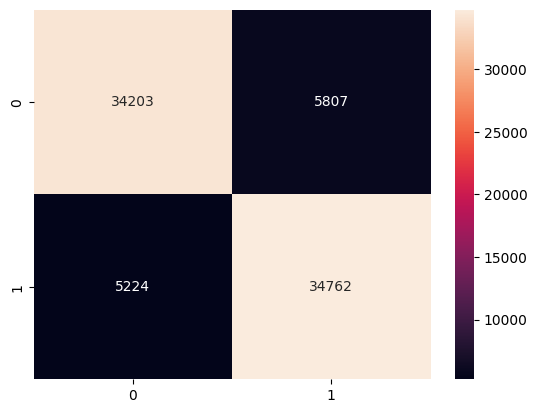

In [46]:
from sklearn.metrics import confusion_matrix

import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd')